In [17]:
import pandas as pd
import geopandas as gpd
from pyresample.geometry import AreaDefinition
from shapely.geometry import Point, Polygon

In [18]:
pd.set_option('max_colwidth', 999)

<Axes: >

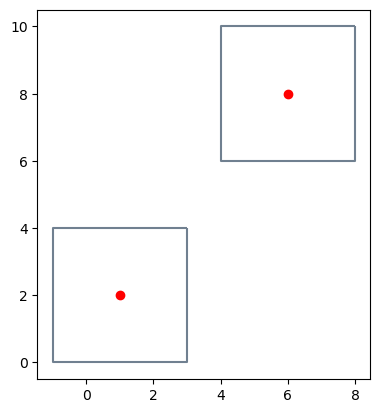

In [ ]:
# Generate some sample data 
p1 = Point((1,2))
p2 = Point((6,8))
points = gpd.GeoSeries([p1,p2])

# Buffer the points using a square cap style
# Note cap_style: round = 1, flat = 2, square = 3
buffer = points.buffer(2, cap_style = 3)

# Plot the results
fig, ax1 = plt.subplots()
buffer.boundary.plot(ax=ax1, color = 'slategrey')
points.plot(ax = ax1, color = 'red')

In [4]:
algotltest_full = AreaDefinition.from_area_of_interest(area_id="algotltest_full", projection='epsg:3006', shape=[20000, 18000], center=[720573.556, 6371774.759], resolution=[10, 10])

In [5]:
algotltest_full

/home/janky/miniforge3/envs/ALGOTLvisTest/lib/python3.11/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: algotltest_full
Description: algotltest_full
Projection: {'ellps': 'GRS80', 'no_defs': 'None', 'proj': 'utm', 'type': 'crs', 'units': 'm', 'zone': '33'}
Number of columns: 18000
Number of rows: 20000
Area extent: (630573.556, 6271774.759, 810573.556, 6471774.759)

In [6]:
# 20000x18000, center=[720573.556, 6371774.759]
c_x = 720573.556
c_y = 6371774.759
ll_x = 630573.556
ll_y = 6271774.759
ur_x = 810573.556
ur_y = 6471774.759

c = Point(c_x, c_y)
ll = Point((ll_x, ll_y))
ul = Point((ll_x, ur_y))
lr = Point((ur_x, ll_y))
ur = Point((ur_x, ur_y))
# print('GEOMETRYCOLLECTION(' + str(ll) + ',', str(ul) + ',', str(lr) + ',', str(ur) + ')')

In [4]:
area_gdf = gpd.GeoDataFrame({'geometry': [c]}, crs='EPSG:3006')

In [5]:
area_gdf.to_crs(epsg=4326)

,geometry
0,POINT (18.67500 57.43500)


In [ ]:
print('POLYGON((' + str(ll_x), str(ll_y) + ',', str(ll_x), str(ur_y) + ',', str(ur_x), str(ur_y) + ',', str(ur_x), str(ll_y) + ',', str(ll_x), str(ll_y) + '))')

POLYGON((630573.556 6271774.759, 630573.556 6471774.759, 810573.556 6471774.759, 810573.556 6271774.759, 630573.556 6271774.759))


In [12]:
algotl_full = Polygon(((630573.556, 6271774.759), (630573.556, 6471774.759), (810573.556, 6471774.759), (810573.556, 6271774.759), (630573.556, 6271774.759)))

In [14]:
area_gdf = gpd.GeoDataFrame({'geometry': [algotl_full]}, crs='EPSG:3006')

In [19]:
area_gdf.to_crs(epsg=4326)

,geometry
0,"POLYGON ((17.12529 56.57208, 17.23218 58.36734, 20.29856 58.27696, 20.04595 56.48769, 17.12529 56.57208))"


In [ ]:
algotl_ll = (626573.556, 6267224.759, 725573.556, 6377224.759)
algotl_ul = (626573.556, 6366324.759, 725573.556, 6476324.759)
algotl_ur = (715573.556, 6366324.759, 814573.556, 6476324.759)
algotl_lr = (715573.556, 6267224.759, 814573.556, 6377224.759)
algotl_list = [algotl_ll, algotl_ul, algotl_ur, algotl_lr]

In [ ]:
for item in algotl_list:
    ll_x, ll_y, ur_x, ur_y,  = item
    print('POLYGON((' + str(ll_x) + ',', str(ll_y) + '), (' + str(ll_x) + ',', str(ur_y) + '), (' + str(ur_x) + ',', str(ur_y) + '), (' + str(ur_x) + ',', str(ll_y) + '), (' + str(ll_x) + ',', str(ll_y) + '))')
    # print('POLYGON((' + str(ll_x), str(ll_y) + ',', str(ll_x), str(ur_y) + ',', str(ur_x), str(ur_y) + ',', str(ur_x), str(ll_y) + ',', str(ll_x), str(ll_y) + '))')
# GEOMETRYCOLLECTION(POLYGON((626573.556 6267224.759, 626573.556 6377224.759, 725573.556 6377224.759, 725573.556 6267224.759, 626573.556 6267224.759)), POLYGON((626573.556 6366324.759, 626573.556 6476324.759, 725573.556 6476324.759, 725573.556 6366324.759, 626573.556 6366324.759)), POLYGON((715573.556 6366324.759, 715573.556 6476324.759, 814573.556 6476324.759, 814573.556 6366324.759, 715573.556 6366324.759)), POLYGON((715573.556 6267224.759, 715573.556 6377224.759, 814573.556 6377224.759, 814573.556 6267224.759, 715573.556 6267224.759)))

POLYGON((626573.556, 6267224.759), (626573.556, 6377224.759), (725573.556, 6377224.759), (725573.556, 6267224.759), (626573.556, 6267224.759))
POLYGON((626573.556, 6366324.759), (626573.556, 6476324.759), (725573.556, 6476324.759), (725573.556, 6366324.759), (626573.556, 6366324.759))
POLYGON((715573.556, 6366324.759), (715573.556, 6476324.759), (814573.556, 6476324.759), (814573.556, 6366324.759), (715573.556, 6366324.759))
POLYGON((715573.556, 6267224.759), (715573.556, 6377224.759), (814573.556, 6377224.759), (814573.556, 6267224.759), (715573.556, 6267224.759))


In [ ]:
pd.set_option('max_colwidth', 999)

In [ ]:
pd.set_option('max_colwidth', 999)

In [ ]:
pd.set_option('max_colwidth', 999)

In [ ]:
al_ll = Polygon(((626573.556, 6267224.759), (626573.556, 6377224.759), (725573.556, 6377224.759), (725573.556, 6267224.759), (626573.556, 6267224.759)))
al_ul = Polygon(((626573.556, 6366324.759), (626573.556, 6476324.759), (725573.556, 6476324.759), (725573.556, 6366324.759), (626573.556, 6366324.759)))
al_ur = Polygon(((715573.556, 6366324.759), (715573.556, 6476324.759), (814573.556, 6476324.759), (814573.556, 6366324.759), (715573.556, 6366324.759)))
al_lr = Polygon(((715573.556, 6267224.759), (715573.556, 6377224.759), (814573.556, 6377224.759), (814573.556, 6267224.759), (715573.556, 6267224.759)))

In [ ]:
area_gdf = gpd.GeoDataFrame({'geometry': [al_ll, al_ul, al_ur, al_lr]}, crs='EPSG:3006')

In [ ]:
print(area_gdf)

                                                                                                                             geometry
0  POLYGON ((626573.556 6267224.759, 626573.556 6377224.759, 725573.556 6377224.759, 725573.556 6267224.759, 626573.556 6267224.759))
1  POLYGON ((626573.556 6366324.759, 626573.556 6476324.759, 725573.556 6476324.759, 725573.556 6366324.759, 626573.556 6366324.759))
2  POLYGON ((715573.556 6366324.759, 715573.556 6476324.759, 814573.556 6476324.759, 814573.556 6366324.759, 715573.556 6366324.759))
3  POLYGON ((715573.556 6267224.759, 715573.556 6377224.759, 814573.556 6377224.759, 814573.556 6267224.759, 715573.556 6267224.759))
